<a href="https://colab.research.google.com/github/syuan0525/project-team/blob/main/modelgenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import glob
import os
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

In [56]:
# 600以上 : S2、GP、KRV、FIDDLE、SR、活力、新名流、DRG、新迪爵、LIMI、六代勁戰
s2 = glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*.jpg") 

gp = glob.glob("./裁剪照片(不含不用裁的)/KYMCO_GP_125_裁/*") 

krv = glob.glob("./裁剪照片(不含不用裁的)/KYMCO_KRV_裁/*")

fiddle = glob.glob("./裁剪照片(不含不用裁的)/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SR_125_裁/*")

vivo = glob.glob("./裁剪照片(不含不用裁的)/SYM_活力_125_裁/*")

famous = glob.glob("./裁剪照片(不含不用裁的)/KYMCO_新名流125_裁/*")

drg = glob.glob("./裁剪照片(不含不用裁的)/SYM_DRG_裁/*") 

duke = glob.glob("./裁剪照片(不含不用裁的)/SYM_新迪爵_125 _裁/*")

limi = glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/*")
# ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"

In [59]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
})
df

,path,ans
0,./裁剪照片(不含不用裁的)/GOGORO_S2_裁/0.jpg,0
1,./裁剪照片(不含不用裁的)/GOGORO_S2_裁/1.jpg,0
2,./裁剪照片(不含不用裁的)/GOGORO_S2_裁/3.jpg,0
3,./裁剪照片(不含不用裁的)/GOGORO_S2_裁/4.jpg,0
4,./裁剪照片(不含不用裁的)/GOGORO_S2_裁/5.jpg,0
...,...,...
4047,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242123753...,10
4048,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242132239...,10
4049,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242140840...,10
4050,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242150895...,10


In [60]:
from tensorflow.keras.applications.mobilenet import MobileNet
mobilenet = MobileNet(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet'
)
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
mobilenet.layers

In [62]:
for l in mobilenet.layers:
  l.trainable = False  # cnn 已經是訓練好的了，所以先凍住cnn的參數 ，只訓練後面的mlp的參數 # 要在 compile 前設

layers = [
          BatchNormalization(),
          GlobalAveragePooling2D(),
          Dropout(0.25),
          # Dense(256, activation="relu"),
          Dense(11, activation="softmax")
]
model = Sequential(mobilenet.layers + layers) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)     

In [63]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

[[[-0.41176468 -0.38039213 -0.38823527]
  [-0.45098037 -0.41960782 -0.44313723]
  [-0.4352941  -0.41176468 -0.41960782]
  ...
  [-0.25490195 -0.25490195 -0.2235294 ]
  [-0.25490195 -0.24705881 -0.21568626]
  [-0.27058822 -0.23137254 -0.20784312]]

 [[-0.41960782 -0.38823527 -0.3960784 ]
  [-0.46666664 -0.4352941  -0.4588235 ]
  [-0.46666664 -0.44313723 -0.45098037]
  ...
  [-0.03529412 -0.03529412 -0.01176471]
  [-0.16862744 -0.1607843  -0.12941176]
  [-0.27843136 -0.24705881 -0.2235294 ]]

 [[-0.4823529  -0.46666664 -0.47450978]
  [-0.52156866 -0.5137255  -0.5137255 ]
  [-0.41176468 -0.41176468 -0.41960782]
  ...
  [ 0.0196079   0.05098045  0.07450986]
  [-0.09019607 -0.06666666 -0.04313725]
  [-0.29411763 -0.26274508 -0.23921567]]

 ...

 [[ 0.6784314   0.67058825  0.6392157 ]
  [ 0.6627451   0.6627451   0.6313726 ]
  [ 0.6313726   0.6392157   0.6       ]
  ...
  [ 0.5764706   0.56078434  0.5058824 ]
  [ 0.5921569   0.58431375  0.5294118 ]
  [ 0.58431375  0.58431375  0.5294118 ]]

 [

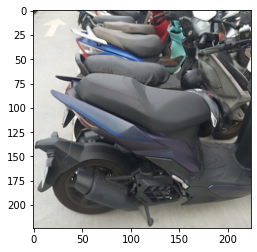

In [64]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# import 匯入 當初預處理的方式
from tensorflow.keras.applications.mobilenet import preprocess_input 
p = df["path"]
# print(len(p))
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)

img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)

In [ ]:
# x = np.array(df["path"])
# y = np.array(df["ans"])

In [75]:
import tensorflow as tf
import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

import imgaug.augmenters as iaa
import imgaug as ia

In [85]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, img_paths, batch_size, img_size, shuffle=True, aug=False):
        self.img_paths = img_paths
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.aug = aug

        self.indexes = np.arange(len(self.img_paths)) # [0, 1, 2, 3, 4, 5]
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.img_paths) / self.batch_size)) # batches per epoch

    def __getitem__(self, index):
        # Generate indexes of the batch
        idxs = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        # Find list of IDs
        batch_img_paths = [self.img_paths[i] for i in idxs]

        # Generates data containing batch_size samples
        x = np.empty((len(batch_img_paths), self.img_size, self.img_size, 3), dtype=np.float32)
        y = np.empty((len(batch_img_paths), 1), dtype=np.float32)
        # y = np.array(df["ans"])

        for i, img_path in enumerate(batch_img_paths):
            # read img
            img = cv2.imread(img_path)
            img = cv2.resize(img, (self.img_size, self.img_size))
            img = img / 255.
            # img = Image.open(img_path).resize((self.img_size, self.img_size)).convert("RGB")
            # img_np = np.array(img)
            # img_np_pre = preprocess_input(img_np)

            if self.aug:
              seq = iaa.Sequential([
                      iaa.Fliplr(0.5), # 50% horizontal flip
                      iaa.Flipud(0), # 50% vertical flip
                      iaa.Affine(
                      rotate=(-45, 45), # random rotate -45 ~ +45 degree
                      shear=(-16, 16), # random shear -16 ~ +16 degree
                      scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale x, y: 80%~120%,
                      mode='constant', # ia.ALL, 'constant','edge', 'symmetric', 'reflect', 'wrap'
                      cval=0,
                        ),
                      ])
              img_aug = seq.augment_image(img)
              img = img_aug # Augmentation

            # read class label
            cls = img_path.split('/')[-2]
            if "S2" in cls:
                cls = 0
            if "GP" in cls:
                cls = 1
            if "KRV" in cls:
                cls = 2
            if "FIDDLE" in cls:
                cls = 3
            if "SR" in cls:
                cls = 4
            if "活力" in cls:
                cls = 5
            if "新名流" in cls:
                cls = 6
            if "DRG" in cls:
                cls = 7
            if "新迪爵" in cls:
                cls = 8
            if "LIMI" in cls:
                cls = 9
            if "六代" in cls:
                cls = 10
            
            x[i] = img
            y[i] = cls
            
        return x, y

    def on_epoch_end(self):
        # Updates indexes after each epoch
        if self.shuffle:
            np.random.shuffle(self.indexes)

In [77]:
img_paths = s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6
len(img_paths)

4052

In [78]:
from sklearn.model_selection import train_test_split
train_img_paths, val_img_paths = train_test_split(img_paths, test_size=0.1)
len(train_img_paths), len(val_img_paths)

(3646, 406)

In [79]:
train_gen = DataGenerator(train_img_paths, 32, 224, shuffle=True, aug=True)
val_gen = DataGenerator(val_img_paths, 32, 224, shuffle=False, aug=False)

In [80]:
train_gen.indexes

array([2503,  749, 1519, ...,  643, 2308, 1350])

In [81]:
len(train_gen)

114

In [86]:
imgs, labels = train_gen[2]

TypeError: ignored

In [ ]:
imgs.shape, labels.shape
print(labels)

In [ ]:
# def data_generator(x, y, batch_size=20):
#   while True:
#     idx = np.random.randint(0, len(x), size=batch_size)
#     x_batch, y_batch = x[idx], y[idx]
#     x_final = []
#     for path in x_batch:
#       img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
#       img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
#       x_final.append(img_pre)            
#     x_final = np.array(x_final)
#     y_batch = np.array(y_batch)
#     yield (x_final, y_batch)
# gen = data_generator(x, y)
# x_gen, y_gen = gen.__next__()
# # print(x_gen.shape)
# # print(y_gen.shape)
# print(x_gen)
# # print(y_gen)


In [ ]:
s2_x = x[y == 0]
gp_x = x[y == 1]
krv_x = x[y == 2]
fiddle_x = x[y == 3]
sr_x = x[y == 4]
vivo_x = x[y == 5]
famous_x = x[y == 6]
drg_x = x[y == 7]
duke_x = x[y == 8]
limi_x = x[y == 9]
gryphus6_x = x[y == 10]

print("s2 共:", len(s2_x))
print("gp 共:", len(gp_x))
print("krv 共:", len(krv_x))
print("fiddle 共:", len(fiddle_x))
print("sr 共:", len(sr_x))
print("vivo 共:", len(vivo_x))
print("famous 共:", len(famous_x))
print("drg 共:", len(drg_x))
print("duke 共:", len(duke_x))
print("limi 共:", len(limi_x))
print("gryphus6 共:", len(gryphus6_x))

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

 # "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    # "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    # + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
scooters = [s2_x, gp_x, krv_x, fiddle_x, sr_x, vivo_x, famous_x, drg_x, duke_x, limi_x, gryphus6_x]
scts_nums = []
# ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"
for i in scooters:
  a = np.random.choice(i, 760, replace=False)
  b, c = train_test_split(a, test_size=0.1)
  num = (a, b, c)
  scts_nums.append(num)
# print(len(scts_nums[:][]))
# S2_380 = np.random.choice(S2_x, 380, replace=False)
# S2_342, S2_38 = train_test_split(S2_380, test_size=0.1)

a = 684
b = 76
x_train = np.concatenate([x[1] for x in scts_nums])
y_train = np.array([0] * a + [1]*a+[2]*a+[3]*a+[4]*a+[5]*a+[6]*a+[7]*a+[8]*a+[9]*a+[10]*a)

x_test = np.concatenate([x[2] for x in scts_nums])
y_test = np.array([0] * b + [1]*b+[2]*b+[3]*b+[4]*b+[5]*b+[6]*b+[7]*b+[8]*b+[9]*b+[10]*b)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [ ]:
# 20 * 19 => 380訓練
# 5 * 19 => 38測試
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=10, restore_best_weights=True),
             ModelCheckpoint("/content/1105.h5", save_best_only=True)
]

model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=300,
    validation_data=test_generator,
    validation_steps=2, 
    callbacks=callbacks
                    )

In [ ]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)



In [ ]:
pre = pre.argmax(axis=1)

In [ ]:
trans = ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]
 # gp + vivo + gryphus6 + SR + DRG + FIDDLE + S2
idx = np.nonzero(pre != y_test)[0]
pre_false_img = ori_imgs[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(30, 30))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(11)],
        columns=["{}(預測)".format(trans[i]) for i in range(11)]
)

In [ ]:
model = load_model('/content/1105.h5')

In [ ]:
import requests
from tensorflow.keras.models import load_model
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
# model = load_model('/content/1105.h5').
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)
# trans = ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model


In [ ]:
# clear graph
K.clear_session()

In [ ]:
model = load_model("/content/1105.h5")
model.summary()

In [ ]:
p = df["path"]
idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
path = p[idx]

img = image.load_img(path, target_size=(224,224))
cv2_imshow(cv2.resize(cv2.imread(path), (224,224)))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
trans = ["s2", "gp", "krv_x", "fiddle", "sr_x", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]
preds = model.predict(x)
ans = preds.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", preds[0])

In [ ]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("conv_pw_13")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1) 


In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((7, 7))
plt.matshow(heatmap)
plt.show()

In [ ]:
img = cv2.imread(path)

In [ ]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY +img


In [ ]:
cv2_imshow(cv2.resize(cv2.imread(path), (224,224)))
img = cv2.resize(img, (224,224))
cv2_imshow(img)